In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

# Exponential random numbers
## Define a function to generate exponential random numbers

In [3]:
def exponential_rng(lam=1.0):
    """ Generates exponential random numbers.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random numbers with rate lam
    """
    return -np.log(np.random.rand()) / lam

## Test the function

In [3]:
exponential_rng()

1.6527659069609888

## Generate draws and compare to theoretical density

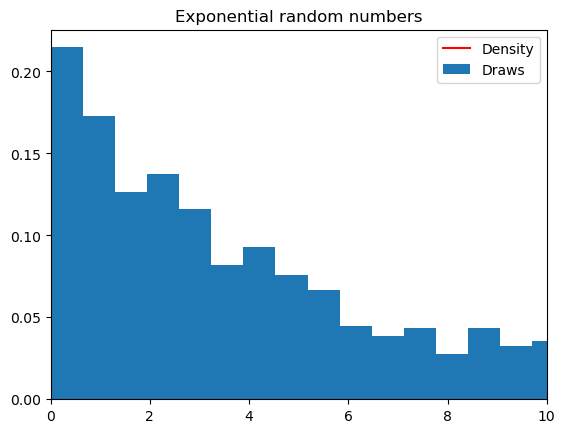

In [4]:
lam = 0.2

fig = plt.figure()
ax = plt.subplot(1,1,1)

#Density
x = np.arange(0,15,0.01)
exponential_pdf = lambda x: lam * np.exp(-lam * x)
ax.plot(x, exponential_pdf(x), 'r', label='Density')

#Draws
draws = [exponential_rng(lam) for i in range(1000)]
num_bins = 50
n, bins, patches = ax.hist(draws, num_bins, density=1, label='Draws')

ax.set(title='Exponential random numbers')
plt.xlim(0,10)
ax.legend()
fig.savefig("figure_exponential.pdf", dpi=300)
plt.show()

# Homogeneous Poisson process
## Define a function to generate arrivals according to Poisson process

In [5]:
def homogeneous_poisson_process(lam, T):
    """ Generates arrivals according to homogeneous Poisson process. 
    
    Keywords:
        lam (real): rate of Poisson process
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
    """
    
    t = 0
    times = []
    while True:
        t += exponential_rng(lam)
        if t > T:
            break
        else:
            times.append(t)
    return times

## Generate homogeneous Poisson process

In [6]:

lam = 4.0 #Poisson process rate
T = 1 #Poisson process duration
D = 10000 #Number of process draws

#homo_poisson_process(lam, T)
arrivals = [homogeneous_poisson_process(lam, T) for d in range(D)]
arrivals

[[0.01797756600356565,
  0.1837115356832541,
  0.2365208334148807,
  0.2679762087847037,
  0.33570939694631563,
  0.527450509898898],
 [0.18849017118282557, 0.5901356978936011, 0.9820091664888048],
 [0.25944413502303837,
  0.28254064014556335,
  0.49149444708822054,
  0.9225721536027676,
  0.9937729589915023],
 [0.6232291085021171],
 [0.19127972477225716,
  0.31739592252179405,
  0.743622601818966,
  0.9075711445247867,
  0.9931397572117502],
 [0.15912950549049376, 0.16643889287907543, 0.31715001721311176],
 [0.18728299808445115,
  0.34976274064359536,
  0.8203880672522521,
  0.9264605834487025],
 [0.19733255475830128, 0.20178154527149322, 0.7070481123339232],
 [0.67253190012651],
 [0.04981331057432395,
  0.16547837337686339,
  0.22643262991015728,
  0.8669808609124248,
  0.8740811640170741,
  0.9052358106490526],
 [0.018391967208511915,
  0.24863827211685047,
  0.42752425525584425,
  0.521815385975916,
  0.8386353360183738,
  0.936267161858156],
 [0.058569457724072835,
  0.43843045043

In [7]:
arrivals_flat = [i for a in arrivals for i in a]
arrivals_flat

[0.01797756600356565,
 0.1837115356832541,
 0.2365208334148807,
 0.2679762087847037,
 0.33570939694631563,
 0.527450509898898,
 0.18849017118282557,
 0.5901356978936011,
 0.9820091664888048,
 0.25944413502303837,
 0.28254064014556335,
 0.49149444708822054,
 0.9225721536027676,
 0.9937729589915023,
 0.6232291085021171,
 0.19127972477225716,
 0.31739592252179405,
 0.743622601818966,
 0.9075711445247867,
 0.9931397572117502,
 0.15912950549049376,
 0.16643889287907543,
 0.31715001721311176,
 0.18728299808445115,
 0.34976274064359536,
 0.8203880672522521,
 0.9264605834487025,
 0.19733255475830128,
 0.20178154527149322,
 0.7070481123339232,
 0.67253190012651,
 0.04981331057432395,
 0.16547837337686339,
 0.22643262991015728,
 0.8669808609124248,
 0.8740811640170741,
 0.9052358106490526,
 0.018391967208511915,
 0.24863827211685047,
 0.42752425525584425,
 0.521815385975916,
 0.8386353360183738,
 0.936267161858156,
 0.058569457724072835,
 0.4384304504380777,
 0.5116222498676722,
 0.7089756283882

## Plot arrival times

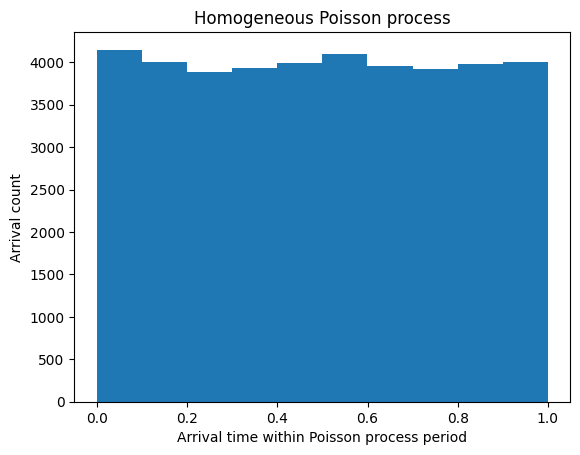

In [8]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

num_bins = 10
n, bins, patches = ax.hist(arrivals_flat, num_bins, density=0)

ax.set(title='Homogeneous Poisson process',
      xlabel='Arrival time within Poisson process period',
      ylabel='Arrival count')
fig.savefig("figure_homogeneous_poisson.pdf", dpi=300)
plt.show()

# Nonhomogeneous Poisson process
## Define a function to generate arrivals according to non-homogeneous Poisson process

In [9]:
def non_homogeneous_poisson_process(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
    """
    
    t = 0
    times = []
    while True:
        t += exponential_rng(lam_max)
        if t > T:
            break
        else:
            u = np.random.rand()
            lam = lam_t(t)
            if u < (lam / lam_max):
                times.append(t)
    return times

## Generate nonhomogeneous poisson processes

In [12]:
lam = 4.0
lam_t = lambda t: lam * np.sin(t) + lam
lam_max = lam * 2
T = 10
D = 10000

arrivals = [non_homogeneous_poisson_process(lam_t, lam_max, T) for d in np.arange(D)]
arrivals_flat = [i for a in arrivals for i in a]
arrivals_flat

[0.33176012911738695,
 0.38157172214150836,
 0.5289082120238358,
 0.6952448903143882,
 0.8371221871714685,
 1.027042772747383,
 1.0290369706074778,
 1.0521834997627237,
 1.2648639961956538,
 1.3569908203733527,
 1.6075334592947177,
 1.863175898418215,
 1.999301001216967,
 2.0678624647549784,
 2.097165413387936,
 2.254287246091906,
 2.384314080752049,
 2.9106363915359696,
 2.921557662583353,
 3.0337629963440866,
 5.84099230711026,
 6.339319049419042,
 6.413903594740155,
 6.544474408530195,
 6.612216678629914,
 6.623715856651932,
 6.679255588660008,
 6.708965892624614,
 6.777335074383094,
 6.781390017928333,
 6.964544643298074,
 6.995631892786561,
 7.022771828114625,
 7.18034705496396,
 7.247134342708034,
 7.49429637304214,
 7.716587849384572,
 7.859247855795625,
 7.891039016756749,
 7.937829016251645,
 8.217774781058896,
 8.882707727900657,
 8.890818074531422,
 8.93640453942369,
 9.568206686050743,
 9.67102513021048,
 9.828953924848333,
 0.0011285337010010017,
 0.13762568730968486,
 0.1

## Plot arrival times

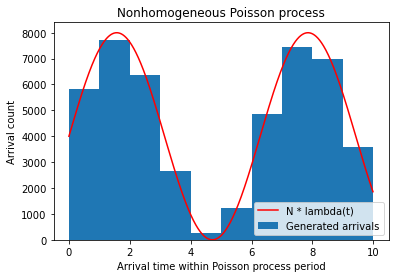

In [11]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

#Lambda function
x = np.arange(0,T,0.01)
lam_func = lambda x: D * lam_t(x)
ax.plot(x, lam_func(x), 'r', label='N * lambda(t)')

#Generate arrivals
num_bins = 10
n, bins, patches = ax.hist(arrivals_flat, num_bins, density=0, label='Generated arrivals')

ax.set(title='Nonhomogeneous Poisson process',
      xlabel='Arrival time within Poisson process period',
      ylabel='Arrival count')
ax.legend()
fig.savefig("figure_non_homogeneous_poisson.pdf", dpi=300)
plt.show()

## Extra questions
### Efficiency

In [5]:
def non_homogeneous_poisson_process_extra0(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
        efficiency (real): (0-1) efficiency of non-homogeneous Poisson process 
    """
    
    t = 0
    times = []
    counter = 0
    
    t = 0
    times = []
    while True:
        t += exponential_rng(lam_max)
        if t > T:
            break
        else:
            u = np.random.rand()
            lam = lam_t(t)
            counter += 1
            if u < (lam / lam_max):
                times.append(t)
    efficiency = len(times) / counter
    return times, efficiency

In [6]:
lam = 4.0
lam_t = lambda t: lam * np.sin(t) + lam
lam_max = lam * 2
T = 10
D = 1000

arrivals, efficiency = zip(*[non_homogeneous_poisson_process_extra0(lam_t, lam_max, T) for d in range(D)])
len(efficiency)
np.mean(efficiency)

0.587830881442046

### Piecewise lambda

In [14]:
def non_homogeneous_poisson_process_extra1(lam_t, lam_max, T):
    """ Generates arrivals according to non-homogeneous Poisson process with time-dependent rate lam_t. 
    
    Keywords:
        lam_t (function handle): function returning the Poisson process rate at time t
        lam_max (real): maximum value of lam_t(t) to be used for generating arrivals
        T (int): duration of Poisson process
    
    Returns:
        times: array of event times
        efficiency (real): (0-1) efficiency of non-homogeneous Poisson process 
    """
    
    t = 0
    times = []
    counter = 0
    
    #Piecewise lam_max
    lam_max_tmp = lam_max #for 0 to pi
    lam_max_tmp_nxt = lam_max / 2 #for pi to 2*pi
    interval = 1
    
    while True: 
        #Calculate correct inter-arrival time
        inter_arrival_time = exponential_rng(lam_max_tmp)
        while True:
            if t + inter_arrival_time > interval * np.pi: #If outside of current interval
                if t + inter_arrival_time > T: 
                    #If outside Poisson process period, then terminate.
                    return times, len(times) / counter
                else: 
                    #If inside Poisson process period, then generate inter-arrival time with rate lam_t+1 
                    #such that inter-arrival time + current time outside of current interval
                    inter_arrival_time -= interval * np.pi - t
                    inter_arrival_time *= lam_max_tmp / lam_max_tmp_nxt
                    t = interval * np.pi
                    
                    interval += 1
                    lam_max_tmp_old = lam_max_tmp
                    lam_max_tmp = lam_max_tmp_nxt
                    lam_max_tmp_nxt = lam_max_tmp_old
            else: #If inside current interval
                if t + inter_arrival_time > T: 
                    #If outside poisson process period, then terminate. 
                    return times, len(times) / counter
                else: 
                    #If inside Poisson process period, then break. 
                    break
        
        #Generate event
        t += inter_arrival_time
        u = np.random.rand()
        lam = lam_t(t)
        counter += 1
        if u < (lam / lam_max_tmp):
            times.append(t)

In [17]:
arrivals, efficiency = zip(*[non_homogeneous_poisson_process_extra1(lam_t, lam_max, T) for d in range(D)])
np.mean(efficiency)

0.7257696774280971

In [20]:
arrivals = []
efficiency = []
for d in range(10):
    arrivals_i, efficiency_i = non_homogeneous_poisson_process_extra1(lam_t, lam_max, T)
    arrivals.append(arrivals_i)
    efficiency.append(efficiency_i)

In [21]:
np.mean(efficiency)

0.7252683572582399